# Forecasting analysis

In [1]:
import matplotlib.dates as mdates
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mticker
import util
from PIL import Image
from sirds_model_visualization import get_sirds, get_sirds_extras, show_performance, plot_result, plot_parameters, \
    plot_fuzzy_variables, calculate_performance, plot_outbreak_result, plot_outbreak_result_forecasting_focus, \
    plot_outbreak_0_result

## Reading data

In [2]:
df = pd.read_csv("data/output/df_forecastings_confidence_interval.csv")
df.date = pd.to_datetime(df.date, infer_datetime_format=True)

In [3]:
df_covid_brazil = pd.read_csv('data/output/df_ts_epidemic_episodes.csv')
df_covid_brazil.DATA = pd.to_datetime(df_covid_brazil.DATA)
df_covid_brazil['TAXA_CASOS_NOVOS_MEDIA_MOVEL_7_DIAS_PAINEL'] = df_covid_brazil.CASOS_NOVOS_MEDIA_MOVEL_7_DIAS_PAINEL / df_covid_brazil.POPULACAO_2022 * 100000

In [4]:
df_forecastings = pd.read_csv('data/output/df_sirds.csv')
df_forecastings.date = pd.to_datetime(df_forecastings.date)
df_forecastings = df_forecastings[df_forecastings.alpha == 0]

In [5]:
df_forecastings_outbreak_0 = pd.read_csv('data/output/df_sirds_outbreak_0.csv')
df_forecastings_outbreak_0.date = pd.to_datetime(df_forecastings_outbreak_0.date)

In [6]:
df_measures = pd.read_csv('data/output/df_sirds_measures.csv')

## Show results

## Analyzing the use of the regularization terms

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0


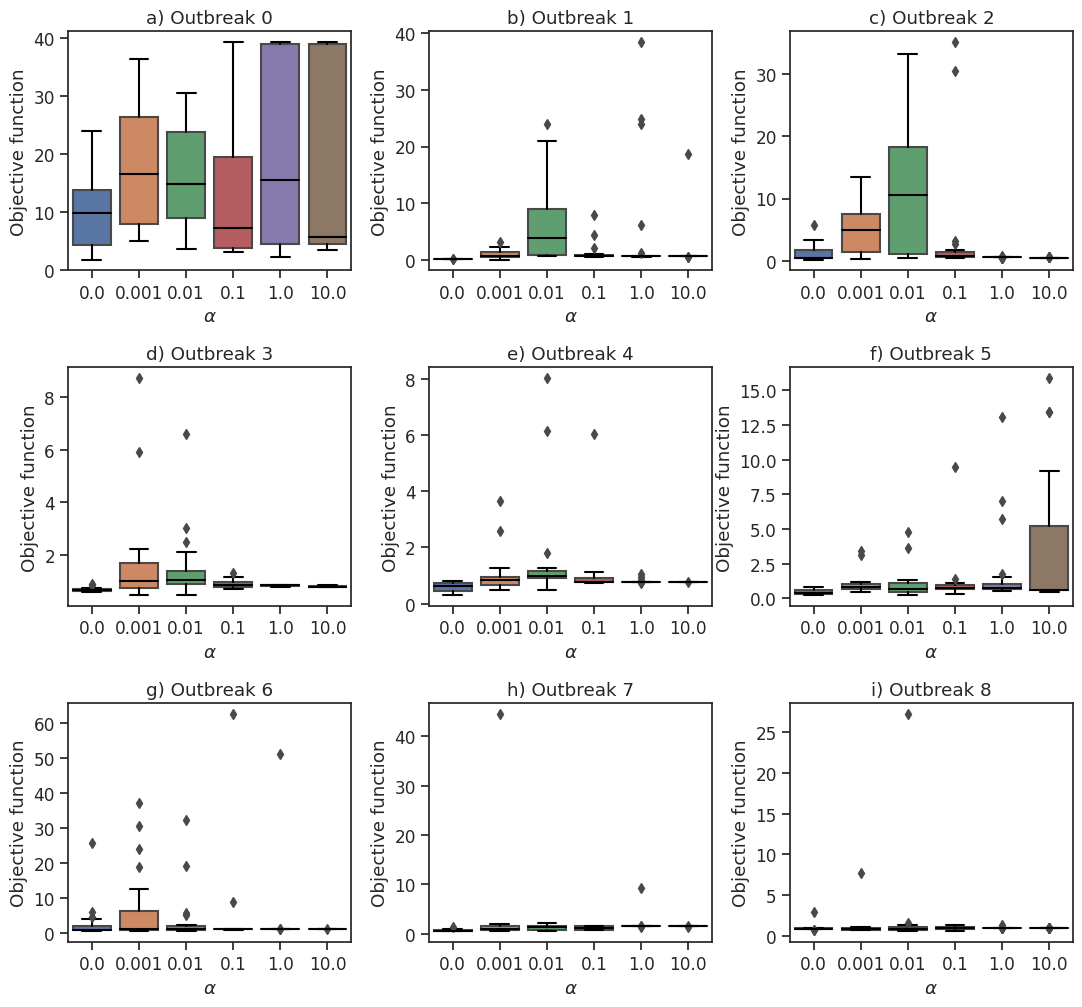

In [22]:
sns.set(font_scale=1.1)
sns.set_style("ticks")

# Assuming df_measures.outbreak.unique() contains the unique outbreaks
unique_outbreaks = df_measures.outbreak.unique()

# Set up the subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(util.centimeter_to_inch(28), util.centimeter_to_inch(26.1)))

letter_index = 'a'

for i, outbreak in enumerate(unique_outbreaks):
    print(outbreak)
    
    df_measures_outbreak = df_measures[df_measures.outbreak == outbreak]
    
    # Determine the position in the grid
    row, col = divmod(i, 3)
    
    # Create a subplot in the specified position
    ax = axes[row, col]
    
    sns.boxplot(x=df_measures_outbreak.alpha, y=df_measures_outbreak.mae_predicton, ax=ax)
    
    letter = chr(ord(letter_index) + int(outbreak))
    ax.set_title(letter + ') Outbreak '+str(int(outbreak)))
    
    ax.set_ylabel('Objective function')
    ax.set_xlabel(r'$\alpha$')
    
    plt.setp(ax.lines, color='black')
    plt.setp(ax.artists, edgecolor='black', facecolor='white')

# Adjust layout
plt.tight_layout()

# Save or show the plot
plt.savefig('images/boxplot_sirds_result_combined.png', bbox_inches="tight")
plt.savefig('images/boxplot_sirds_result_combined.pdf', bbox_inches="tight")
plt.show()

### General results

In [7]:
df_measures.columns

Index(['outbreak', 'alpha', 'estimation', 'mae_fit', 'sse_D_fit', 'r2_D_fit',
       'sse_Rt_fit', 'r2_Rt_fit', 'mae_predicton', 'sse_D_predicton',
       'r2_D_predicton', 'sse_Rt_predicton', 'r2_Rt_predicton',
       'mae_predicton_month_1', 'sse_D_predicton_month_1',
       'r2_D_predicton_month_1', 'sse_Rt_predicton_month_1',
       'r2_Rt_predicton_month_1', 'mae_predicton_month_2',
       'sse_D_predicton_month_2', 'r2_D_predicton_month_2',
       'sse_Rt_predicton_month_2', 'r2_Rt_predicton_month_2',
       'mae_predicton_month_3', 'sse_D_predicton_month_3',
       'r2_D_predicton_month_3', 'sse_Rt_predicton_month_3',
       'r2_Rt_predicton_month_3'],
      dtype='object')

In [8]:
df_alpha_0 = df_measures[df_measures.alpha == 0]
for outbreak in df_alpha_0.outbreak.unique():
    print('Outbreak: ', outbreak)
    df_outbreak = df_alpha_0[df_alpha_0.outbreak == outbreak]
    
    for column in ['mae_fit', 'mae_predicton_month_1', 'mae_predicton_month_2', 'mae_predicton_month_3']:
        mae = df_outbreak[column].values
        mean = np.mean(mae)
        lower_bound, upper_bound = util.calculate_confidence_interval(mae)
        print(column, round(mean, 2), '(', round(lower_bound,2), ',', round(upper_bound,2), ')')

Outbreak:  0.0
mae_fit 0.4 ( 0.39 , 0.41 )
mae_predicton_month_1 2.22 ( 1.81 , 2.61 )
mae_predicton_month_2 13.17 ( 8.99 , 17.57 )
mae_predicton_month_3 8.2 ( 6.31 , 10.39 )
Outbreak:  1.0
mae_fit 0.06 ( 0.06 , 0.06 )
mae_predicton_month_1 0.11 ( 0.1 , 0.11 )
mae_predicton_month_2 0.13 ( 0.12 , 0.13 )
mae_predicton_month_3 0.13 ( 0.11 , 0.15 )
Outbreak:  2.0
mae_fit 0.06 ( 0.06 , 0.06 )
mae_predicton_month_1 0.41 ( 0.29 , 0.56 )
mae_predicton_month_2 1.07 ( 0.59 , 1.69 )
mae_predicton_month_3 1.83 ( 1.03 , 2.88 )
Outbreak:  3.0
mae_fit 0.07 ( 0.07 , 0.07 )
mae_predicton_month_1 0.22 ( 0.2 , 0.24 )
mae_predicton_month_2 0.63 ( 0.59 , 0.69 )
mae_predicton_month_3 0.84 ( 0.82 , 0.87 )
Outbreak:  4.0
mae_fit 0.08 ( 0.08 , 0.08 )
mae_predicton_month_1 0.46 ( 0.4 , 0.52 )
mae_predicton_month_2 0.66 ( 0.59 , 0.71 )
mae_predicton_month_3 0.6 ( 0.51 , 0.68 )
Outbreak:  5.0
mae_fit 0.1 ( 0.1 , 0.1 )
mae_predicton_month_1 0.39 ( 0.3 , 0.49 )
mae_predicton_month_2 0.46 ( 0.37 , 0.57 )
mae_predicto

In [9]:
df_measures[df_measures.alpha == 0][['outbreak','mae_fit', 'mae_predicton', 'sse_D_fit', 'sse_D_predicton', 'r2_D_fit', 'r2_D_predicton','sse_Rt_fit', 'sse_Rt_predicton', 'r2_Rt_fit', 'r2_Rt_predicton']].groupby('outbreak').mean().round(4)

,mae_fit,mae_predicton,sse_D_fit,sse_D_predicton,r2_D_fit,r2_D_predicton,sse_Rt_fit,sse_Rt_predicton,r2_Rt_fit,r2_Rt_predicton
outbreak,,,,,,,,,,
0.0,0.4006,9.8790,0.0000,32.9624,0.9060,-0.5809,0.1522,0.5560,-0.7079,-18.8173
1.0,0.0592,0.1205,0.0001,0.0020,0.9987,-1.3021,0.0052,0.0013,0.9765,-0.6665
2.0,0.0593,1.2434,0.0001,0.9449,0.9962,-0.2085,0.0029,0.0243,0.9782,-4.9732
3.0,0.0707,0.6970,0.0002,0.6110,0.9932,-142.8966,0.0035,0.0257,0.9686,-0.9563
4.0,0.0765,0.5945,0.0003,0.5082,0.9926,-143.4052,0.0047,0.0130,0.9531,-0.2814
5.0,0.0992,0.4457,0.0009,0.0789,0.9940,-2.6907,0.0097,0.0085,0.8849,-3.9507
6.0,0.1181,2.8789,0.0043,3.1665,0.9673,-33.5348,0.0063,0.0660,0.9101,0.3280
7.0,0.1460,0.6678,0.0050,0.0021,0.9603,-0.2552,0.0055,0.0333,0.9252,0.2224
8.0,0.1609,1.0136,0.0043,0.0036,0.9648,-2138.2477,0.0081,0.1240,0.8815,-0.5460


In [10]:
df_measures[df_measures.alpha == 0][['outbreak', 'r2_D_fit', 'r2_D_predicton', 'r2_D_predicton_month_1', 'r2_D_predicton_month_2', 'r2_D_predicton_month_3']].groupby('outbreak').median().round(4)

,r2_D_fit,r2_D_predicton,r2_D_predicton_month_1,r2_D_predicton_month_2,r2_D_predicton_month_3
outbreak,,,,,
0.0,0.9053,-0.7490,0.0122,-2.9190,-2.5959
1.0,0.9989,-0.8837,-9.0167,-28.0439,-9.2831
2.0,0.9961,0.0531,0.3942,-2.3718,-27.2763
3.0,0.9931,-106.4657,-27.7291,-173.4161,-2944.8633
4.0,0.9926,-112.9315,-398.5608,-1785.0270,-299.1641
5.0,0.9954,-2.7975,-7.8878,-22.7010,-249.0651
6.0,0.9903,-27.0725,-188.4548,-308.8136,-414.0453
7.0,0.9612,0.2497,-8.6447,-1.7070,-19.4997
8.0,0.9659,-742.2135,-522.6886,-7033.6003,-53182.1715


Outbreak:  0.0


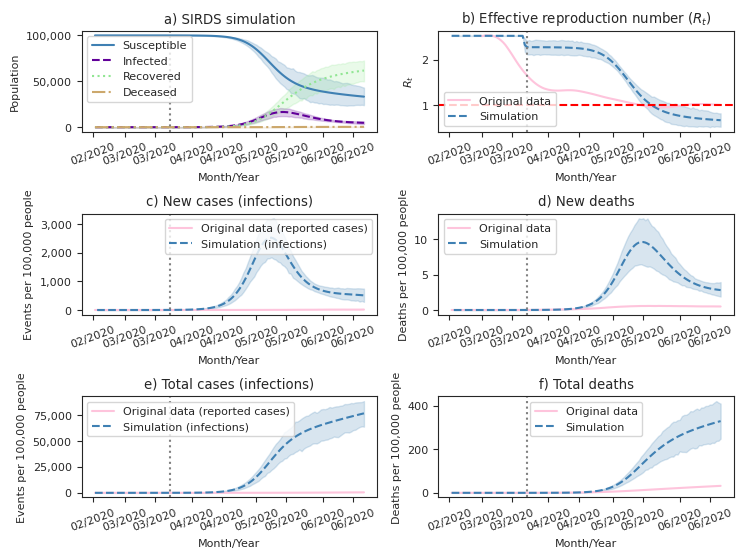

Outbreak:  1.0


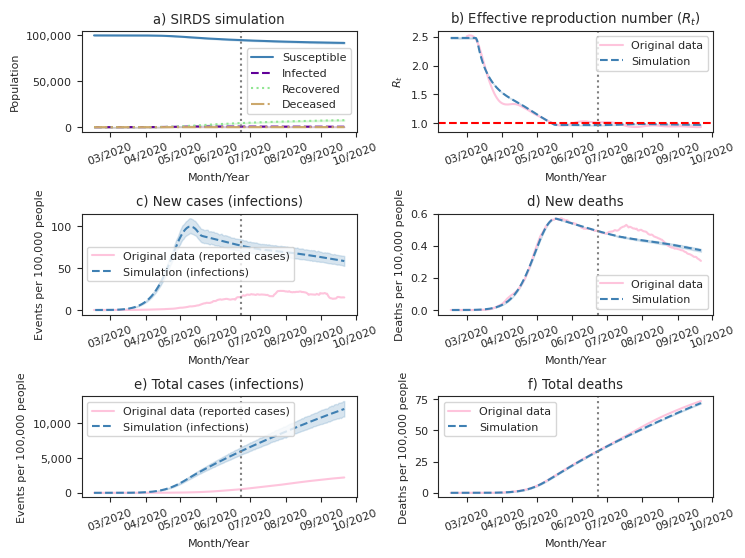

Outbreak:  2.0


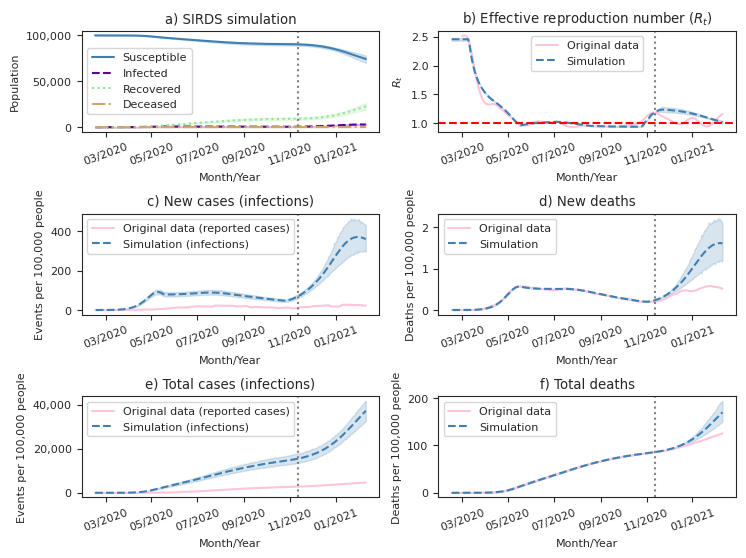

Outbreak:  3.0


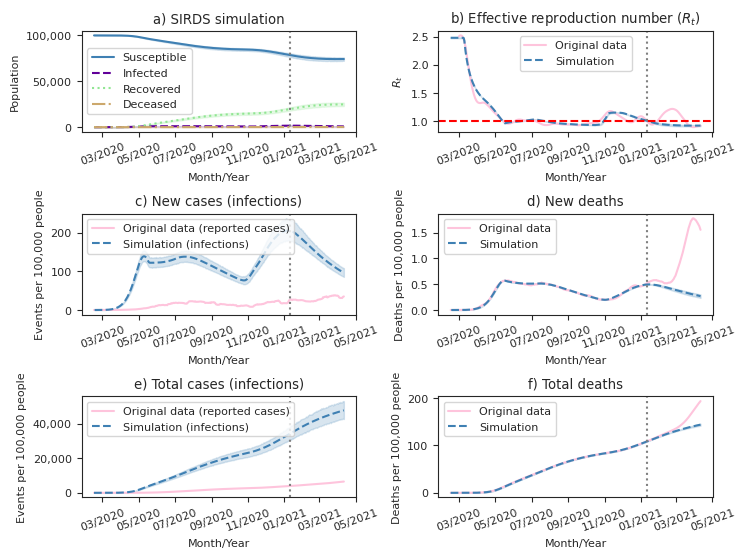

Outbreak:  4.0


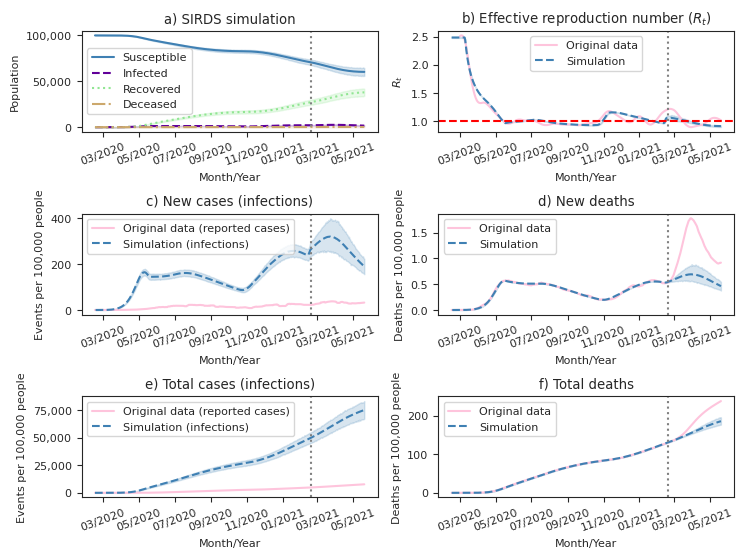

Outbreak:  5.0


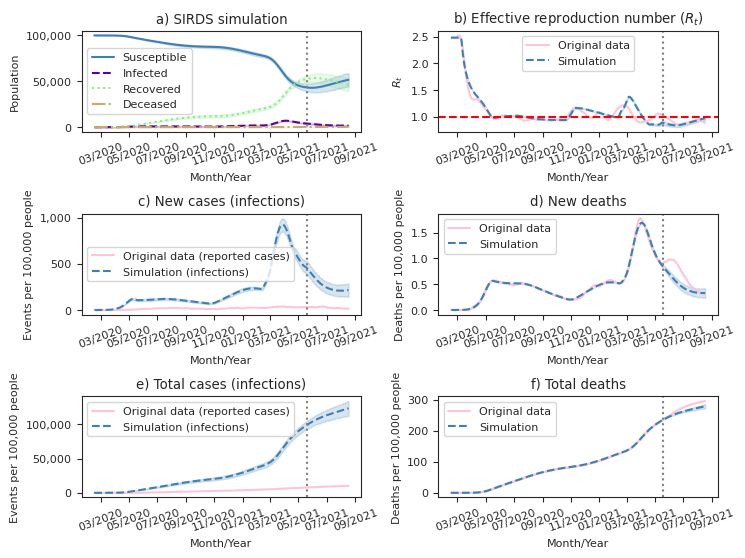

Outbreak:  6.0


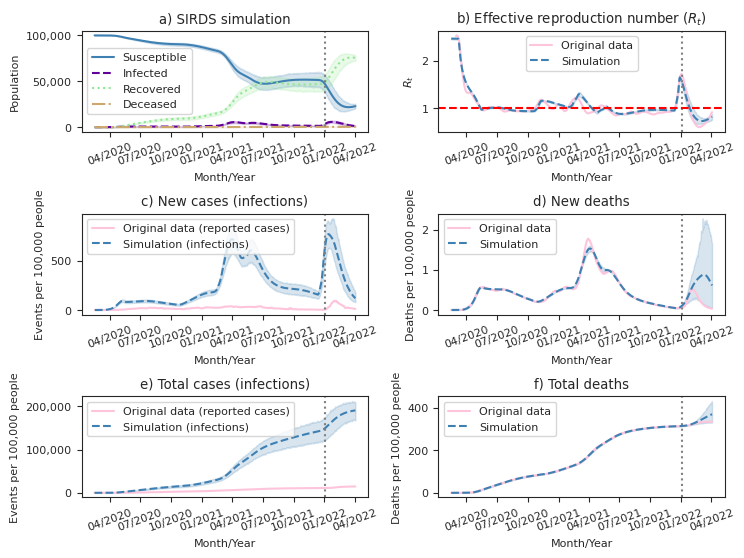

Outbreak:  7.0


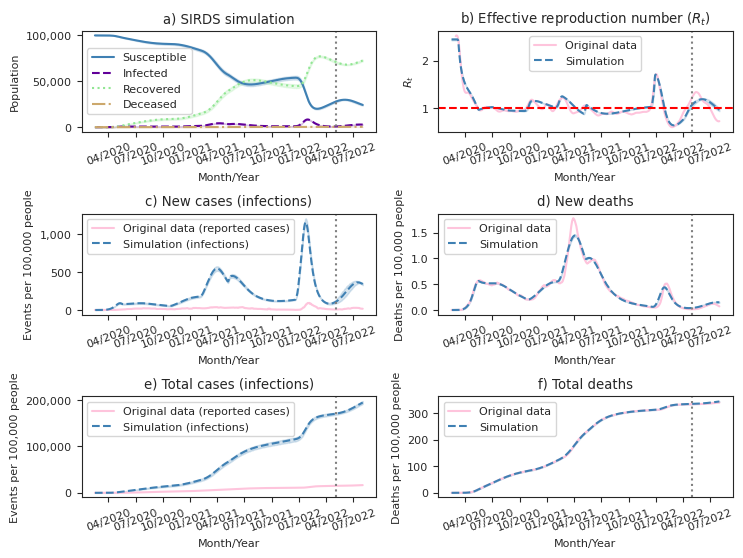

Outbreak:  8.0


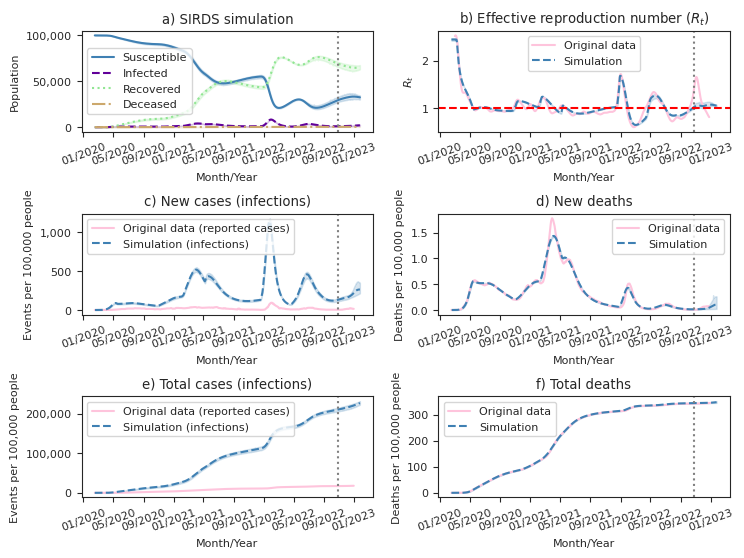

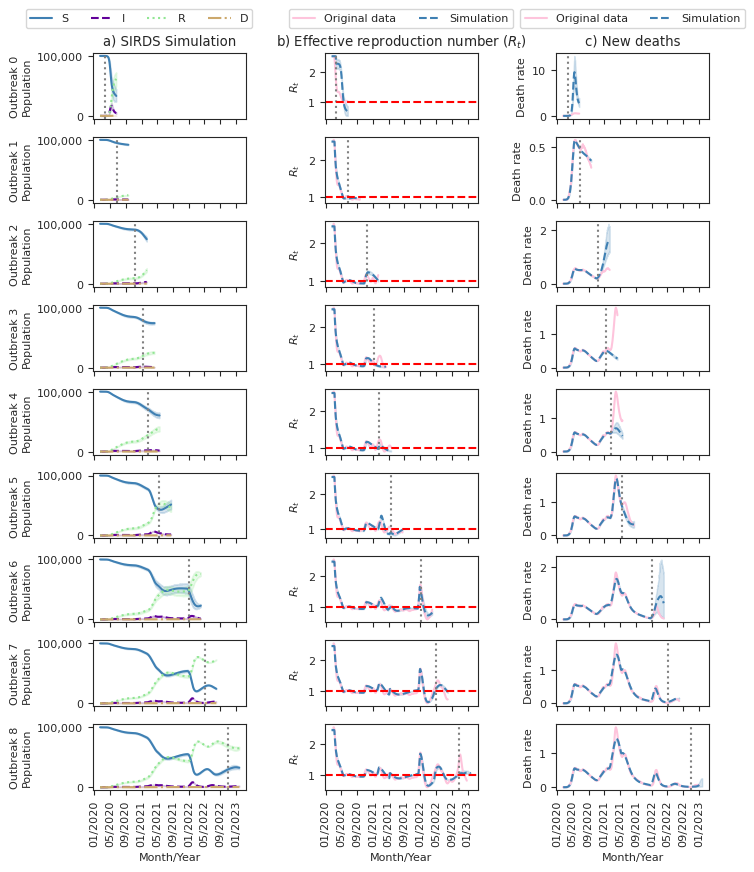

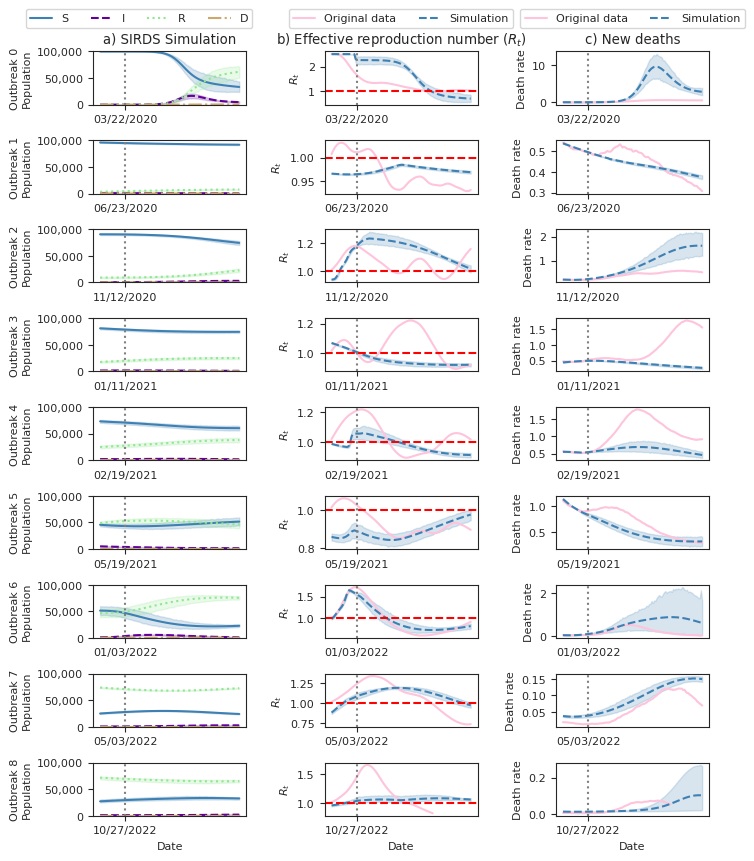

In [11]:
dict_outbreak_S = {}
dict_outbreak_I = {}
dict_outbreak_R = {}
dict_outbreak_D = {}
dict_outbreak_new_deaths = {}
dict_outbreak_rt = {}
dict_max_date_to_fit = {}

date_first_case = df_forecastings.date.min()

for outbreak in df_forecastings.outbreak.unique():
    print('Outbreak: ', outbreak)
    df_forecastings_outbreak = df_forecastings[df_forecastings.outbreak == outbreak]
    date_max = df_forecastings_outbreak.date.max()
    df_covid_brazil_outbreak = df_covid_brazil[(df_covid_brazil.DATA >= date_first_case) & (df_covid_brazil.DATA <= date_max)]
    
    real_reproduction_number = df_covid_brazil_outbreak.NUMERO_REPRODUCAO_EFETIVO_SRAG_MEDIA.values
    real_new_deaths = df_covid_brazil_outbreak.TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS_SIM.values
    real_total_deaths = df_covid_brazil_outbreak.TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS_SIM.cumsum().values
    real_new_cases = df_covid_brazil_outbreak.TAXA_CASOS_NOVOS_MEDIA_MOVEL_7_DIAS_PAINEL.values
    real_total_cases = df_covid_brazil_outbreak.TAXA_CASOS_NOVOS_MEDIA_MOVEL_7_DIAS_PAINEL.cumsum().values
    
    df_S = df_forecastings_outbreak[['date', 'S']]
    df_I = df_forecastings_outbreak[['date', 'I']]
    df_R = df_forecastings_outbreak[['date', 'R']]
    df_D = df_forecastings_outbreak[['date', 'D']]
    df_I_accumulated = df_forecastings_outbreak[['date', 'I_accumulated']]
    df_new_deaths = df_forecastings_outbreak[['date', 'D_new_deaths']].rename(columns={'D_new_deaths': 'deaths'})
    df_rt = df_forecastings_outbreak[['date', 'reproduction_number_sird']].rename(columns={'reproduction_number_sird': 'rt'})
    df_new_cases = df_forecastings_outbreak[['date', 'I_new_cases']].rename(columns={'I_new_cases': 'cases'})
                
    max_date_to_fit = df_forecastings_outbreak[df_forecastings_outbreak.train_period == True].date.max()
                
    plot_result(df_S, df_I, df_R, df_D, df_new_deaths, df_I_accumulated, real_new_deaths, real_total_deaths, real_reproduction_number, df_rt, real_total_cases, real_new_cases, df_new_cases, df_covid_brazil_outbreak.DATA.values, id_in_file='_forecasting_outbreak_'+str(outbreak), max_date_to_fit=max_date_to_fit)
    
    dict_outbreak_S[outbreak] = df_S
    dict_outbreak_I[outbreak] = df_I
    dict_outbreak_R[outbreak] = df_R
    dict_outbreak_D[outbreak] = df_D
    dict_outbreak_rt[outbreak] = df_rt
    dict_outbreak_new_deaths[outbreak] = df_new_deaths
    dict_max_date_to_fit[outbreak] = max_date_to_fit

real_reproduction_number = df_covid_brazil[(df_covid_brazil.DATA >= date_first_case)].NUMERO_REPRODUCAO_EFETIVO_SRAG_MEDIA.values
real_new_deaths = df_covid_brazil[(df_covid_brazil.DATA >= date_first_case)].TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS_SIM.values

plot_outbreak_result(dict_outbreak_S, dict_outbreak_I, dict_outbreak_R, dict_outbreak_D, dict_outbreak_rt, dict_outbreak_new_deaths, dict_max_date_to_fit, real_reproduction_number, real_new_deaths)
plot_outbreak_result_forecasting_focus(dict_outbreak_S, dict_outbreak_I, dict_outbreak_R, dict_outbreak_D, dict_outbreak_rt, dict_outbreak_new_deaths, dict_max_date_to_fit, real_reproduction_number, real_new_deaths)

In [12]:
df.dropna().groupby(['outbreak', 'train_period', 'actual_inside_confidence_interval']).count()[['date']]

date
outbreak train_period actual_inside_confidence_interval      
0.0      False        False                                86
                      True                                  4
         True         False                                32
                      True                                  3
1.0      False        False                                86
                      True                                  4
         True         False                               108
                      True                                 20
2.0      False        False                                90
         True         False                               245
                      True                                 25
3.0      False        False                                90
         True         False                               309
                      True                                 21
4.0      False        False                                87
                      True                                  3
         True         False                               341
                      True                                 28
5.0      False        False                                64
                      True                                 26
         True         False                               383
                      True                                 75
6.0      False        False                                45
                      True                                 45
         True         False                               549
                      True                                138
7.0      False        False                                86
                      True                                  4
         True         False                               733
                      True                                 74
8.0      False        False                                53
                      True                                 12
         True         False                               886
                      True                                 98

### Outbreak zero results

In [13]:
df_forecastings_outbreak_0.columns

Index(['date', 'S', 'I', 'R', 'D', 'I_accumulated', 'D_new_deaths',
       'reproduction_number_sird', 'I_new_cases', 'days_between_infections',
       'case_fatality_probability', 'loss_immunity_in_days', 'train_period',
       'outbreak', 'alpha', 'estimation', 'days_to_fit_within_outbreak'],
      dtype='object')

days_to_fit:  21.0
days_to_fit:  28.0
days_to_fit:  35.0
days_to_fit:  42.0
days_to_fit:  49.0
days_to_fit:  56.0
days_to_fit:  63.0
days_to_fit:  70.0


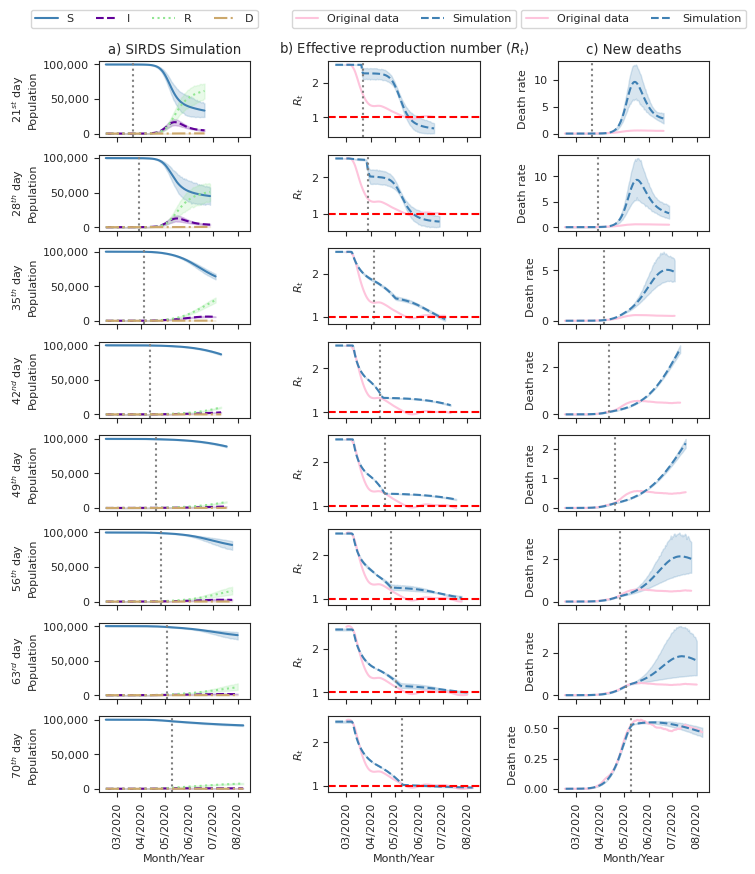

In [14]:
dict_days_to_fit_S = {}
dict_days_to_fit_I = {}
dict_days_to_fit_R = {}
dict_days_to_fit_D = {}
dict_days_to_fit_new_deaths = {}
dict_days_to_fit_rt = {}
dict_max_date_to_fit = {}

date_first_case = df_forecastings_outbreak_0.date.min()

for days_to_fit in df_forecastings_outbreak_0.days_to_fit_within_outbreak.unique():
    print('days_to_fit: ', days_to_fit)
    df_forecastings_outbreak_0_days_to_fit = df_forecastings_outbreak_0[df_forecastings_outbreak_0.days_to_fit_within_outbreak == days_to_fit]
    date_max = df_forecastings_outbreak_0_days_to_fit.date.max()
    df_covid_brazil_days_to_fit = df_covid_brazil[(df_covid_brazil.DATA >= date_first_case) & (df_covid_brazil.DATA <= date_max)]
    
    real_reproduction_number = df_covid_brazil_days_to_fit.NUMERO_REPRODUCAO_EFETIVO_SRAG_MEDIA.values
    real_new_deaths = df_covid_brazil_days_to_fit.TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS_SIM.values
    real_total_deaths = df_covid_brazil_days_to_fit.TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS_SIM.cumsum().values
    real_new_cases = df_covid_brazil_days_to_fit.TAXA_CASOS_NOVOS_MEDIA_MOVEL_7_DIAS_PAINEL.values
    real_total_cases = df_covid_brazil_days_to_fit.TAXA_CASOS_NOVOS_MEDIA_MOVEL_7_DIAS_PAINEL.cumsum().values
    
    df_S = df_forecastings_outbreak_0_days_to_fit[['date', 'S']]
    df_I = df_forecastings_outbreak_0_days_to_fit[['date', 'I']]
    df_R = df_forecastings_outbreak_0_days_to_fit[['date', 'R']]
    df_D = df_forecastings_outbreak_0_days_to_fit[['date', 'D']]
    df_I_accumulated = df_forecastings_outbreak_0_days_to_fit[['date', 'I_accumulated']]
    df_new_deaths = df_forecastings_outbreak_0_days_to_fit[['date', 'D_new_deaths']].rename(columns={'D_new_deaths': 'deaths'})
    df_rt = df_forecastings_outbreak_0_days_to_fit[['date', 'reproduction_number_sird']].rename(columns={'reproduction_number_sird': 'rt'})
    df_new_cases = df_forecastings_outbreak_0_days_to_fit[['date', 'I_new_cases']].rename(columns={'I_new_cases': 'cases'})
                
    max_date_to_fit = df_forecastings_outbreak_0_days_to_fit[df_forecastings_outbreak_0_days_to_fit.train_period == True].date.max()
    
    dict_days_to_fit_S[days_to_fit] = df_S
    dict_days_to_fit_I[days_to_fit] = df_I
    dict_days_to_fit_R[days_to_fit] = df_R
    dict_days_to_fit_D[days_to_fit] = df_D
    dict_days_to_fit_rt[days_to_fit] = df_rt
    dict_days_to_fit_new_deaths[days_to_fit] = df_new_deaths
    dict_max_date_to_fit[days_to_fit] = max_date_to_fit

real_reproduction_number = df_covid_brazil[(df_covid_brazil.DATA >= date_first_case)].NUMERO_REPRODUCAO_EFETIVO_SRAG_MEDIA.values
real_new_deaths = df_covid_brazil[(df_covid_brazil.DATA >= date_first_case)].TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS_SIM.values

plot_outbreak_0_result(dict_days_to_fit_S, dict_days_to_fit_I, dict_days_to_fit_R, dict_days_to_fit_D, dict_days_to_fit_rt, dict_days_to_fit_new_deaths, dict_max_date_to_fit, real_reproduction_number, real_new_deaths)